<a href="https://colab.research.google.com/github/mukjos/ROA-AQI-Project/blob/main/ROA_AQI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

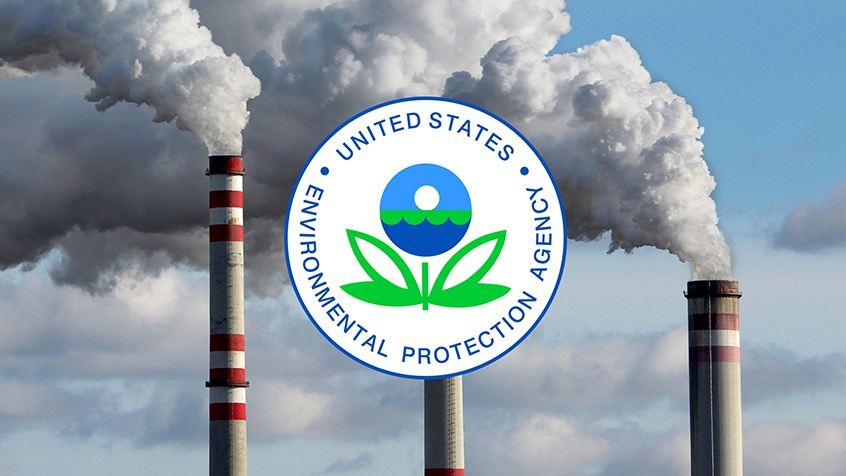

# **Introduction**

We are working for an environmental agency. The agency is formulating policy recommendations to improve the air quality in **America**, using the Environmental Protection Agency's Air Quality Index (**AQI**) to guide their decision making.

An AQI value close to 0 signals "little to no" public health concern, while higher values are associated with increased risk to public health.

They've tasked us with leveraging AQI data to help them prioritize their strategy for improving air quality in America.

The Agency is considering the following decisions, and for each one of them, we are called to construct a hypothesis test and an accompanying visualization, using the results of that test to make a recommendation:

1. The Agency is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the othre counties of California.

2. With limited resources, The Agence has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?

3. A new policy will affect those states with a mean AQI of 10 or greater. Will Michigan be affected by this new policy ?

Notes:

For your analysis, we'll by default use a significance level of 5%.

# **Analyze the data and do the hypothesis test**

In [1]:
# import packages
import pandas as pd
from scipy import stats

### **Import Packages**

In [2]:
# 1. Loading of the data from Github into a dataframe

aqi_df = pd.read_csv("https://raw.githubusercontent.com/mukjos/ROA-AQI-Project/refs/heads/main/data/air_quality_index_data.csv", index_col = 0)

#aqi_df = aqi_df.dropna()

### **Inspection du Dataframe**

In [ ]:
# dsplay our dataframe structure
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_local        260 non-null    object 
 1   state_name        260 non-null    object 
 2   county_name       260 non-null    object 
 3   city_name         260 non-null    object 
 4   local_site_name   257 non-null    object 
 5   parameter_name    260 non-null    object 
 6   units_of_measure  260 non-null    object 
 7   arithmetic_mean   260 non-null    float64
 8   aqi               260 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 20.3+ KB


In [ ]:
# Generate descriptive statistics of our DataFrame
aqi_df.describe()


,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


In [ ]:
aqi_df.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


### **QUESTION 1**

The Agency wants to know if the mean AQI(Air Quality Indice) in Los Angeles County is statistically different from AQI in the other counties of California-State

#### **1. Collect data**

In [ ]:
# Count the records numbers of each county of "California" state
aqi_df_California = aqi_df[aqi_df["state_name"] == "California"].groupby("county_name").count()

aqi_df_California

,date_local,state_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
county_name,,,,,,,,
Alameda,4,4,4,4,4,4,4,4
Butte,1,1,1,1,1,1,1,1
Contra Costa,3,3,3,3,3,3,3,3
Fresno,3,3,3,3,3,3,3,3
Humboldt,1,1,1,1,1,1,1,1
Imperial,1,1,1,1,1,1,1,1
Inyo,1,1,1,1,1,1,1,1
Kern,2,2,2,2,2,2,2,2
Los Angeles,14,14,14,14,14,14,14,14


In [ ]:
#filter aqi data to retain only data for "Los angeles" county
condition = (aqi_df["state_name"] == "California") & (aqi_df["county_name"] == "Los Angeles") # We verify also if the state_name == "California" just in case ther could be another "Los Angeles" in another state than the "California" State
aqi_df_los_angeles = aqi_df[condition]
aqi_df_los_angeles.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
33,2018-01-01,California,Los Angeles,Lancaster,Lancaster-Division Street,Carbon monoxide,Parts per million,0.394737,7
42,2018-01-01,California,Los Angeles,Santa Clarita,Santa Clarita,Carbon monoxide,Parts per million,0.394737,7
61,2018-01-01,California,Los Angeles,Pasadena,Pasadena,Carbon monoxide,Parts per million,0.789474,16
76,2018-01-01,California,Los Angeles,Los Angeles,LAX Hastings,Carbon monoxide,Parts per million,0.863158,17
109,2018-01-01,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,Carbon monoxide,Parts per million,0.994737,17
110,2018-01-01,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,Carbon monoxide,Parts per million,0.900000,16
119,2018-01-01,California,Los Angeles,Reseda,Reseda,Carbon monoxide,Parts per million,1.015789,19
132,2018-01-01,California,Los Angeles,Compton,Compton,Carbon monoxide,Parts per million,1.742105,40
163,2018-01-01,California,Los Angeles,Azusa,Azusa,Carbon monoxide,Parts per million,0.673684,10
172,2018-01-01,California,Los Angeles,Pico Rivera,Pico Rivera #2,Carbon monoxide,Parts per million,1.047368,18


In [ ]:
# The mean aqi in the "Los Angeles" county
mean_aqi_df_los_angeles = aqi_df_los_angeles["aqi"].mean()
mean_aqi_df_los_angeles

np.float64(16.285714285714285)

In [ ]:
#filter aqi data to retain data for other counties of "California" state
condition = (aqi_df["state_name"] == "California") & (aqi_df["county_name"] != "Los Angeles")
aqi_df_other_counties = aqi_df[condition]
aqi_df_other_counties.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
16,2018-01-01,California,San Bernardino,Ontario,Ontario Near Road (Etiwanda),Carbon monoxide,Parts per million,0.747368,11
18,2018-01-01,California,Sacramento,Arden-Arcade,Sacramento-Del Paso Manor,Carbon monoxide,Parts per million,0.752632,16
26,2018-01-01,California,Orange,La Habra,La Habra,Carbon monoxide,Parts per million,0.673684,13
27,2018-01-01,California,Alameda,Not in a city,Berkeley- Aquatic Park,Carbon monoxide,Parts per million,1.088889,15
34,2018-01-01,California,Fresno,Fresno,Fresno - Garland,Carbon monoxide,Parts per million,1.000000,15
40,2018-01-01,California,San Mateo,Redwood City,Redwood City,Carbon monoxide,Parts per million,0.672222,10
43,2018-01-01,California,Contra Costa,Concord,Concord,Carbon monoxide,Parts per million,0.294444,5
45,2018-01-01,California,Butte,Chico,Chico-East Avenue,Carbon monoxide,Parts per million,0.466667,9
46,2018-01-01,California,Riverside,Mira Loma,Mira Loma (Van Buren),Carbon monoxide,Parts per million,1.231579,27
58,2018-01-01,California,Kern,Arvin,Arvin-Di Giorgio,Carbon monoxide,Parts per million,0.278947,3


In [ ]:
# The mean aqi other counties
mean_aqi_df_other_counties = aqi_df_other_counties["aqi"].mean()
mean_aqi_df_other_counties

np.float64(11.0)

In [ ]:
mean_aqi_df_los_angeles - mean_aqi_df_other_counties

np.float64(5.285714285714285)

We have collected the different aqi values :
1. From the "Los Angeles County" : m1 = 16.3
2. From other counties           : m2 = 11.0

The difference is 5.3

Question : Is this difference statistically significant, or is it due to chance ?

Lets do a Hypothesis test to verify that

#### **2. Set the Null Hypothesis(*Ho*) and the Alternative Hypothesis(*Ha*)**

*Ho* : There is no difference in aqi value between the "Los Angeles" county and the other counties of the state of "California"

*Ha* : There is a difference in aqi values between the 2 counties : aqi value of the "Los Angeles" county is greater than the aqi value in the other counties

#### **3. Choose a significance level**

For our test, we will choose a significance level of 5%(0.05)

#### **4. Find the p-value (NB : We must be sure that the stats module of scipy is already imported. If no, then let's do it now)**

In [ ]:
# For our two-sample t-test, we can use scipy.stats.ttest_ind() to compute your p-value
stats.ttest_ind(a=aqi_df_los_angeles['aqi'], b=aqi_df_other_counties['aqi'], equal_var=False)

TtestResult(statistic=np.float64(2.1107010796372014), pvalue=np.float64(0.049839056842410995), df=np.float64(17.08246830361151))

#### **5. Reject or fail to reject the null hypothesis**

Our p-value(0.049) < significance_level(0.05) : We can conclude that there is a statistically significant difference in the mean aqi values between "Los Angeles" and the other counties of the state of California. We reject the null hypothesis

### **QUESTION 2**

With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?

#### **1. Collect Data**

In [ ]:
# Filter aqi_df to retain only records for "New York" state
aqi_df_new_york = aqi_df[aqi_df["state_name"] == "New York"]
aqi_df_new_york#.aggregate({"aqi" : "sum"})
aqi_df_new_york.value_counts("state_name")

# the mean aqi for "New York" state
mean_aqi_df_new_york = aqi_df_new_york["aqi"].mean()
mean_aqi_df_new_york


np.float64(2.5)

In [ ]:
# Filter aqi_df to retain only records for "Ohio" state
aqi_df_ohio = aqi_df[aqi_df["state_name"] == "Ohio"]
aqi_df_ohio
aqi_df_ohio.value_counts("state_name")

# the mean aqi for "Ohio" state
mean_aqi_df_ohio = aqi_df_ohio["aqi"].mean()
mean_aqi_df_ohio

np.float64(3.3333333333333335)

After Analyzing data for "New York" and "Ohio" States :

*   Mean 1(New York)  : 2.5
*   Mean 2(Ohio)      : 3.3

Yes, with this data we can notice that the aqi in New York is lower than the aqi in Ohio. But is this due to chance, or is this fact statistically significant ? That's what we must, by an hypothesis test, verify :

#### **2. Set the Null Hypothesis(*Ho*) and the Alternative Hypothesis(*Ha*)**

*Ho* : The aqi in new York is greater than or equal that of Ohio

*Ha* : There is a difference between the aqi in New York and the one in Ohio(aqi_NY < aqi_Ohio)

#### **3. Choose a significance level**

For our test, we will choose a significance level of 5%(0.05)

#### **4. Find the p-value**

In [ ]:
stats.ttest_ind(a = aqi_df_new_york['aqi'], b = aqi_df_ohio['aqi'], equal_var = False, alternative = "less")

TtestResult(statistic=np.float64(-2.025951038880333), pvalue=np.float64(0.03044650269193468), df=np.float64(15.036745051598716))

#### **5. Reject or fail to reject the null hypothesis**

Our p-value(0.03) < significance_level(0.05) :
  We reject the null hypothesis, It means that the difference between aqi in New-York and aqi in Ohio(**aqi_NY < aqi_Ohio**) is statistically significant, and not due to chance.

### **QUESTION 3**

A new policy will affect those states with a mean AQI of 10 or greater. Will Michigan be affected by this new policy ?

#### **1. Collect Data**

In [ ]:
# Calcute the mean of each state
mean_aqi_df_by_state = aqi_df.groupby("state_name").mean("aqi")

mean_aqi_df_by_state

# Which states have their aqi >= 10 ?
#mean_aqi_df_by_state[mean_aqi_df_by_state["aqi"] >= 10]

,arithmetic_mean,aqi
state_name,,
Alabama,0.200000,2.000000
Alaska,0.555264,8.500000
Arizona,0.671804,15.214286
Arkansas,0.300000,3.000000
California,0.684871,12.121212
Colorado,0.330994,5.000000
Connecticut,0.200000,3.500000
Delaware,0.215789,3.000000
District Of Columbia,0.222222,2.500000


By Analyzing our result, we can notice that the aqi in the state of Michigan is 8.111111 (aqi_Michigan < 10). But this aqi is only the result we find in the data they gave us. Perhaps, with another sample, we would find an aqi_in_Michigan >= 10.
So, let's do a one-sample t-test as we are comparing one sample mean relative to a particular value in one direction.

#### **2. Set the Null Hypothesis(*Ho*) and the Alternative Hypothesis(*Ha*)**

*Ho* : The aqi in Michigan is equal or less than 10 (aqi_in_Michigan <= 10)

*Ha* : The aqi in Michigan is greater than 10 (aqi_in_Michigan > 10)

#### **3. Choose a significance level :**

For our test, we will choose a significance level of 5%(0.05)

#### **4. Find the p-value**

In [ ]:
# Filter aqi_df to retain only records for "Michigan" state, data that we will need to find our p-value
aqi_df_michigan = aqi_df[aqi_df["state_name"] == "Michigan"]
aqi_df_michigan

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
65,2018-01-01,Michigan,Wayne,Livonia,LIVONIA-NR,Carbon monoxide,Parts per million,0.338889,5
122,2018-01-01,Michigan,Wayne,Detroit,West corner,Carbon monoxide,Parts per million,0.394737,8
123,2018-01-01,Michigan,Wayne,Detroit,MARK TWAIN MIDDLE SCHOOL,Carbon monoxide,Parts per million,0.515789,9
129,2018-01-01,Michigan,Wayne,Detroit,ELIZA-NR,Carbon monoxide,Parts per million,0.616667,11
192,2018-01-01,Michigan,Wayne,Allen Park,Allen Park,Carbon monoxide,Parts per million,0.811111,13
207,2018-01-01,Michigan,Wayne,Not in a city,Eliza Downwind,Carbon monoxide,Parts per million,0.516667,10
226,2018-01-01,Michigan,Kent,Grand Rapids,GR-MONROE,Carbon monoxide,Parts per million,0.200000,2
242,2018-01-01,Michigan,Wayne,Detroit,(Northeast corner),Carbon monoxide,Parts per million,0.378947,7
248,2018-01-01,Michigan,Wayne,Detroit,NORTHWEST,Carbon monoxide,Parts per million,0.415789,8


In [ ]:
stats.ttest_1samp(a = aqi_df_michigan['aqi'], popmean = 10, alternative = "greater")

TtestResult(statistic=np.float64(-1.7395913343286131), pvalue=np.float64(0.9399405193140109), df=np.int64(8))

#### **5. Reject or fail to reject the null hypothesis**

Our p-value(0.93) > significance_level(0.05) : We fail to reject to null hypothesis. That means that we have no statical evidence to state that the AQI in Michigan is greater than 10. That's why the policy will not be applicable to the state of Michigan.